In [1]:
%run ./Vlad_Dissertation.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_12866/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
ts = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - ts * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

In [52]:
##Pre-Training
###SCZ
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(a_distances, scz_cp, scz_slope)

##Post-Training
###SCZ
ymin = 385
ymax = 426
scz_cp_post = 100 - 1.361 * v
scz_slope_post = 1 / 0.061  # negative

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

In [8]:
## Fitted model

Lex, Pr = 1.963e00, 1.044e-01

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)
_, _, _, _, SCZ_Model_RTs = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

SCZ_Model_RTs_pre = fit_RT(SCZ_Model_RTs, SCZ_RTs)

In [6]:
## Fitted model

Lex, Pr = 1.963e00, 1.044e-01
rho_0 = 6.159e-05
sigav_x, locav_x = 5.394e00, 3.271e01

k_a = 5e-05
k_v = 5e-05
stim_counts = 10

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    0.05,
    sigav_x,
    locav_x,
)


_, _, _, _, SCZ_Model_RTs_post = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

SCZ_Model_RTs_post = fit_RT(SCZ_Model_RTs_post, SCZ_RTs_post)

In [66]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex, Pr = 1.963e00, 1.044e-01

SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, SCZrtpost_alter = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

SCZ_Model_RTs_post_alter = fit_RT(SCZrtpost_alter, SCZ_RTs_post)

In [67]:
model_a_distances = np.linspace(a_distances[0], a_distances[-1], 100)

ymin, ymax = np.min(SCZ_Model_RTs_pre), np.max(SCZ_Model_RTs_pre)
SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre = fitting(a_distances, SCZ_Model_RTs_pre)
SCZ_Model_RTs_pre_fit = RTsig(model_a_distances, SCZ_CP_Model_pre, SCZ_SLOPE_Model_pre)

ymin, ymax = np.min(SCZ_Model_RTs_post), np.max(SCZ_Model_RTs_post)
SCZ_CP_Model_post, SCZ_SLOPE_Model_post = fitting(a_distances, SCZ_Model_RTs_post)
SCZ_Model_RTs_post_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post, SCZ_SLOPE_Model_post
)

ymin, ymax = np.min(SCZ_Model_RTs_post_alter), np.max(SCZ_Model_RTs_post_alter)
SCZ_CP_Model_post_alter, SCZ_SLOPE_Model_post_alter = fitting(
    a_distances, SCZ_Model_RTs_post_alter
)
SCZ_Model_RTs_post_alter_fit = RTsig(
    model_a_distances, SCZ_CP_Model_post_alter, SCZ_SLOPE_Model_post_alter
)

In [41]:
import seaborn as sns

sns.set_context("paper")
sns.set_theme(
    style="ticks",
    palette="gray",
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


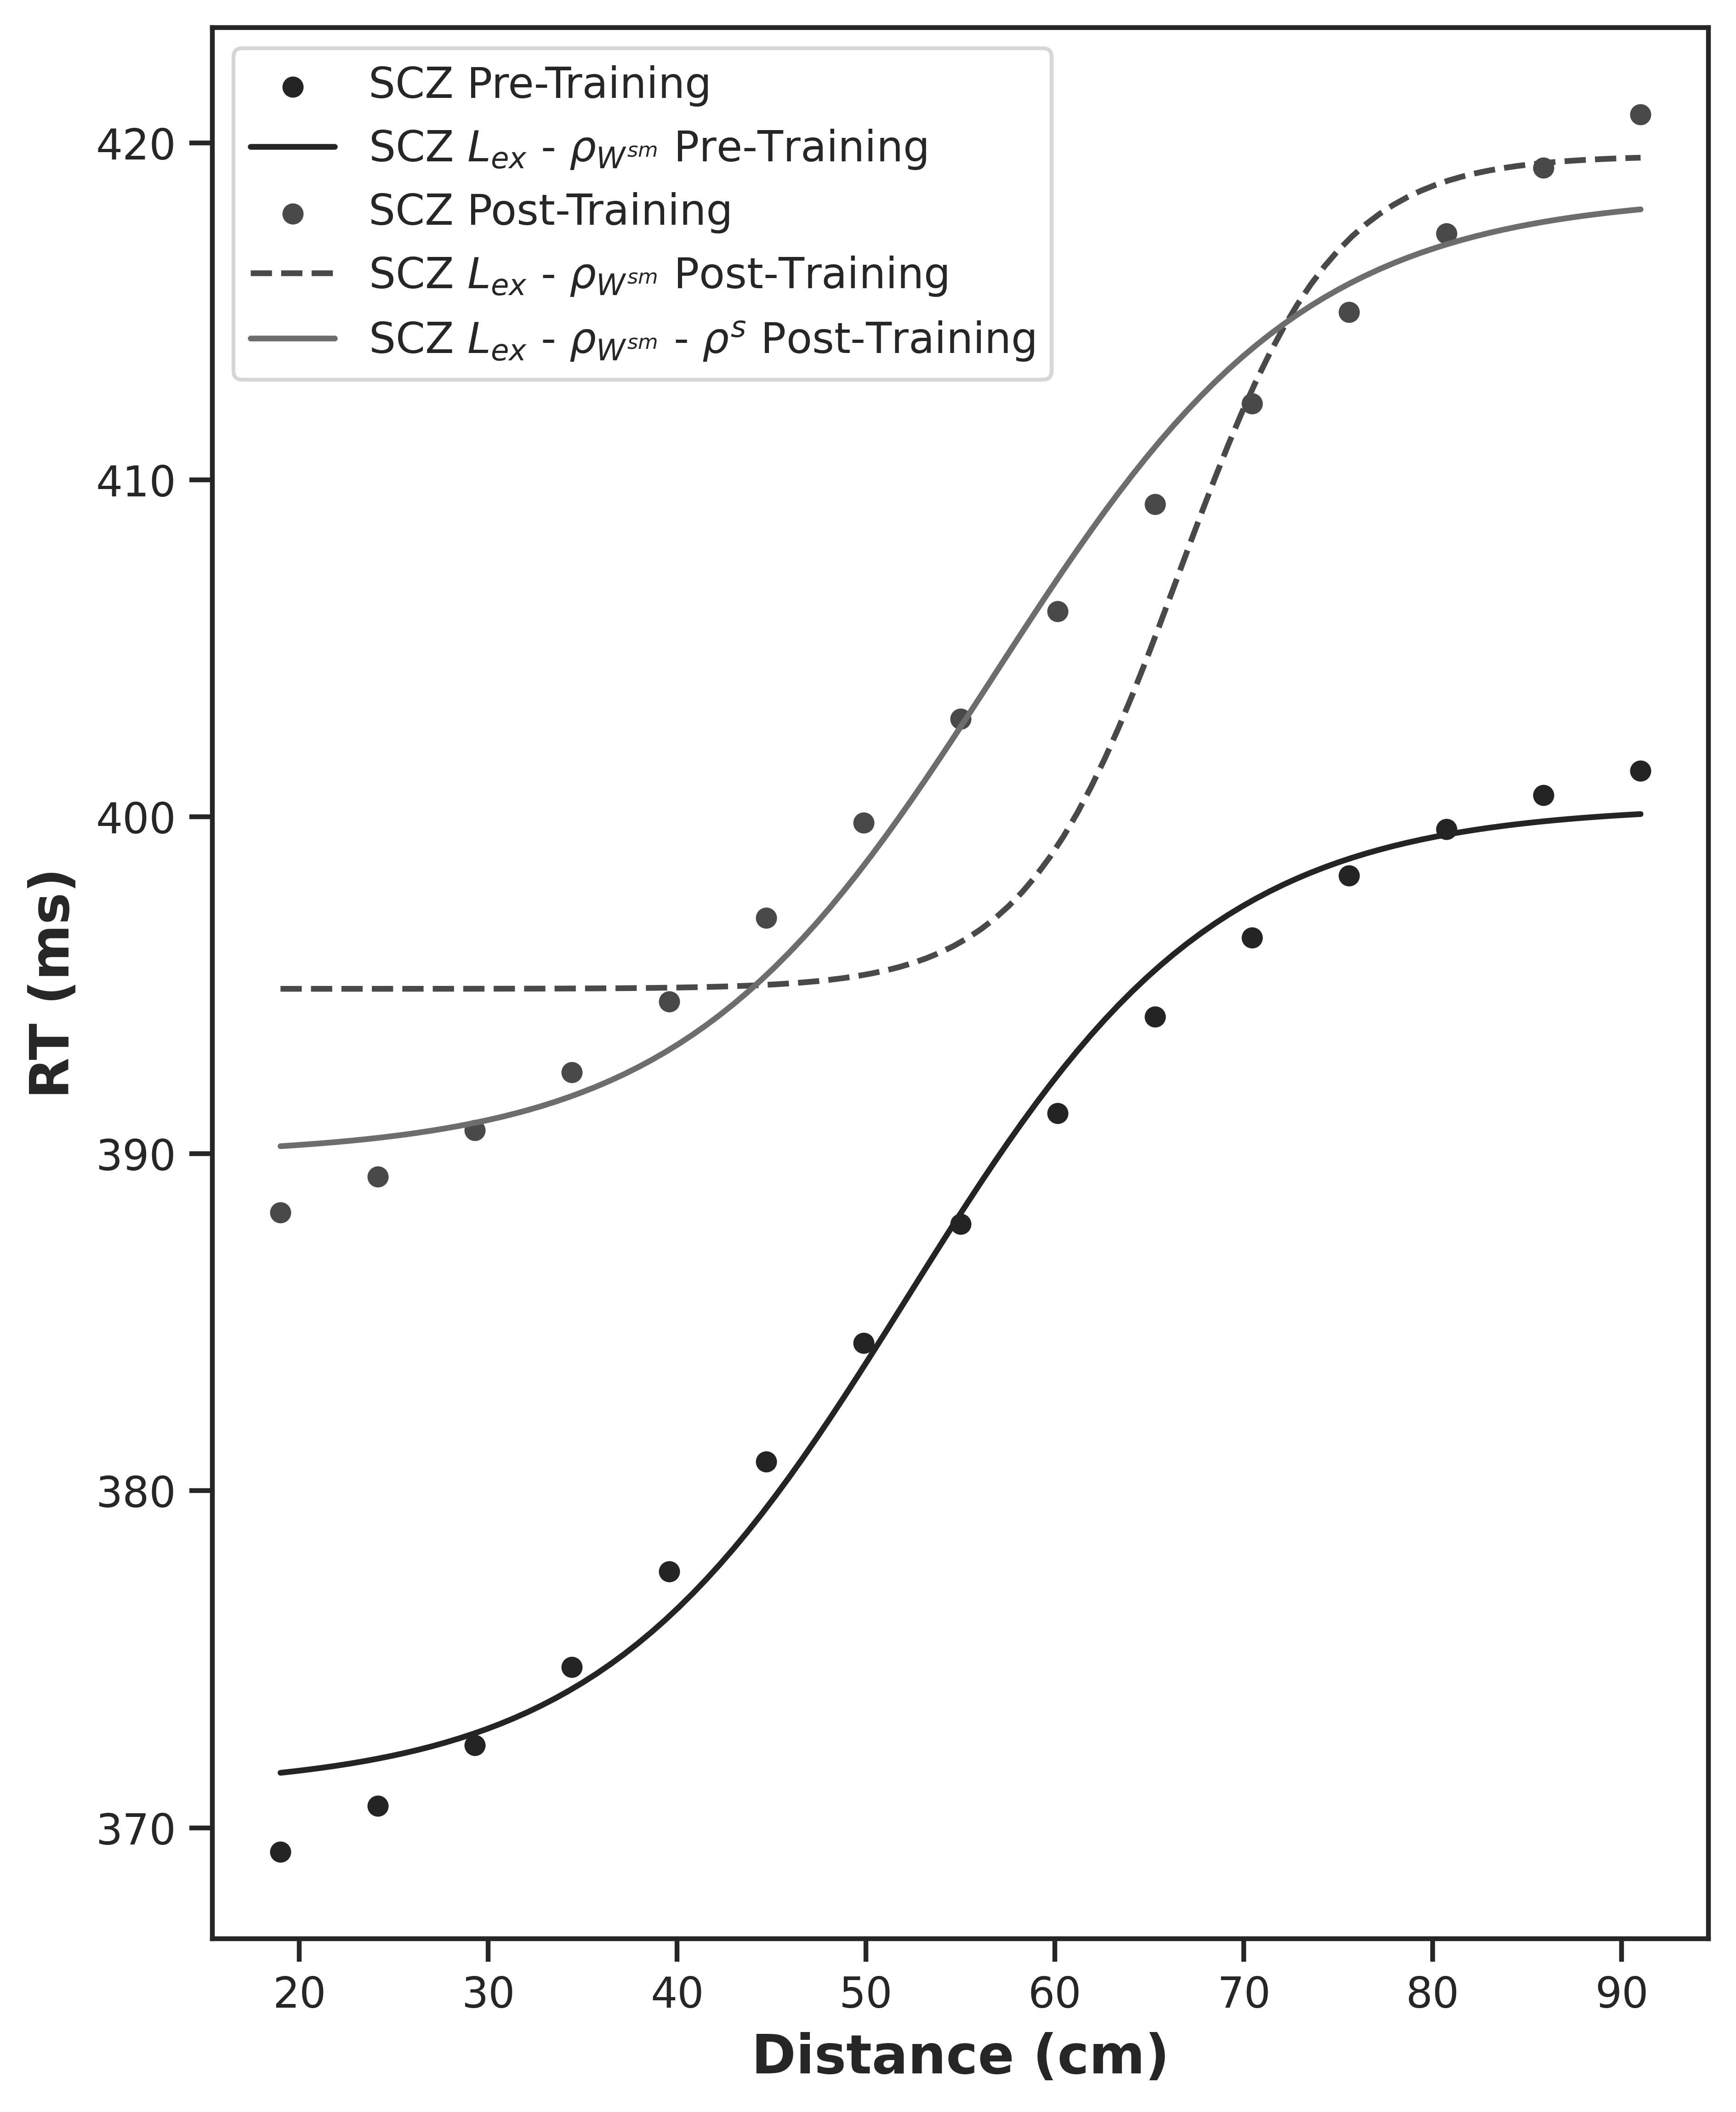

In [82]:
fig, axs = plt.subplots(1, 1, figsize=(7, 9), dpi=600)
ax1 = plt.subplot(111)

sns.scatterplot(x=a_distances, y=SCZ_RTs, label="SCZ Pre-Training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_pre_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ Pre-Training",
    ax=ax1,
)
sns.scatterplot(x=a_distances, y=SCZ_RTs_post, label="SCZ Post-Training", ax=ax1)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_alter_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ Post-Training",
    ax=ax1,
    linestyle="--",
)
sns.lineplot(
    x=model_a_distances,
    y=SCZ_Model_RTs_post_fit,
    label="SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$ - " + r"$\rho^{s}$ Post-Training",
    ax=ax1,
)

ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("RT (ms)")

fig.savefig("drafts/FIG3.eps", bbox_inches="tight", format="eps")